

# HW 2: Analyzing IMDb Data

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

The csv data can be downloaded from https://drive.google.com/open?id=12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l for your offline use purpose

## Part 1

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l'}) # replace the id with id of file you want to access
downloaded.GetContentFile('imdb_1000.csv') 

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [13]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [14]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [15]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [16]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [24]:
# Answer:
#movies_sorted = movies.sort_values(by=['duration'])
#movies_sorted = movies.sort_values('duration')
#print(movies_sorted.head(1)) # find the shortest movie
#print(movies_sorted.tail(1)) # find the longest movie

movies.iloc[movies['duration'].idxmin()]
movies.iloc[movies['duration'].idxmax()]


star_rating                                                     7.8
title                                                        Hamlet
content_rating                                                PG-13
genre                                                         Drama
duration                                                        242
actors_list       [u'Kenneth Branagh', u'Julie Christie', u'Dere...
Name: 476, dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

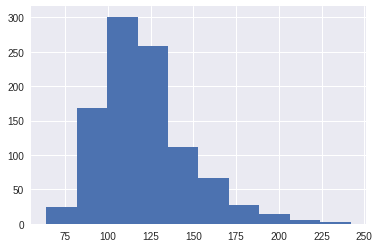

In [25]:
# Answer:
movies['duration'].hist(bins = 10)
#movies['duration'].plot(kind = 'hist', bins = 10)
#movies['duration'].hist(bins = 10)
#movies['duration'].plot(kind = 'hist', bins = 20)

#### Use a box plot to display that same data.

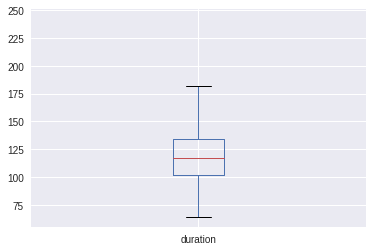

In [0]:
# Answer:
movies['duration'].plot(kind='box')

## Part 2

#### Count how many movies have each of the content ratings.

In [0]:
# Answer: 
#A = movies[['content_rating','title']].groupby('content_rating').count()
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Number of Movies')

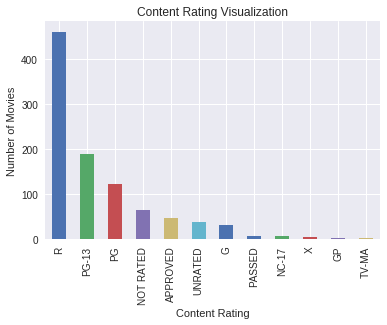

In [0]:
# Answer:
movies['content_rating'].value_counts().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [0]:
# Answer:
#words = ['NOT RATED', 'APPROVED', 'PASSED', 'GP']   # solution #1
#map(lambda x: movies['content_rating'].replace(x, "UNRATED"), words)
#movies['content_rating'].value_counts()

#solution #2
#movies['content_rating'] = [ 'UNRATED' if ( (x =='NOT RATED') | (x =='APPROVED') | (x =='PASSED') | (x =='GP')) else x for x in movies['content_rating']]

movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'],'UNRATED', inplace=True) 
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [0]:
# Answer:
movies['content_rating'].replace(['X', 'TV-MA'],'NC-17', inplace=True) 
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [0]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [0]:
# Answer:
#movies['content_rating'] = ['UNRATED' if pd.isnull(x) else x for x in movies['content_rating']]
movies[movies['content_rating'].isnull()]
movies.content_rating.fillna('UNRATED', inplace=True)


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [0]:
# Answer:
print('Average of star rating for movies 2 hours or longer: ', movies[movies['duration'] >= 120]['star_rating'].mean(), 
 '\nAverage of star rating for movies shorter than 2 hours: ', movies[movies['duration'] < 120]['star_rating'].mean())



Average of star rating for movies 2 hours or longer:  7.948898678414082 
Average of star rating for movies shorter than 2 hours:  7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

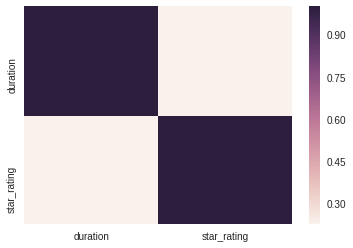

In [0]:
# Answer:
#movies.boxplot(column='duration', by='star_rating')

#movies.plot(kind='scatter', x='duration', y='star_rating')

sns.heatmap(movies[['duration','star_rating']].corr())


#### Calculate the average duration for each genre.

In [0]:
# Answer:
#movies[['duration', 'genre']].groupby('genre').mean()

movies.groupby('genre')['duration'].mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Part 3

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9fadb7940>,
      dtype=object)

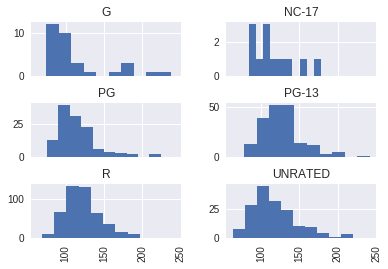

In [0]:
# Answer:
#movies.boxplot(column='duration', by='content_rating', rot = 90)
movies.hist(column='duration', by='content_rating', sharex=True)
#sns.heatmap(movies[['duration','content_rating']].corr())

#### Determine the top rated movie (by star rating) for each genre.

In [0]:
# Answer:

movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [0]:
# Answer:
result = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
result.sort_values('title')


,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [0]:
# Answer:
movies['genre'].value_counts()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies['genre'].isin(top_genres)].groupby('genre').star_rating.mean()



genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [0]:
# Answer:
genres = movies['genre'].value_counts()[movies['genre'].value_counts() >= 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()



genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [0]:
# Answer:
movies[['star_rating', 'genre']].groupby('genre').mean()[movies['genre'].value_counts()>= 10]

#movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [0]:
# Answer:
genre_ratings = movies.groupby('genre')['star_rating'].agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [0]:
#Figure out the top 10 actors who did the most movies

# Make a function which clean the data
def data_clean(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]
#Apply that function    
movies_series = movies['actors_list'].apply(data_clean)
#Declare a list to store the split values
actors_list = []
for movie_actors in movies_series:
    actors_list.append([x.strip() for x in movie_actors.split(',')])
#Declare a dictionary and see if the actor name key exist and then count.
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1
# sort the dictionary by value            
lst = list()
for key,val in list(actor_dict.items()):
  lst.append((val,key))

lst.sort(reverse = True)
for key,val in lst[:10]:
  print(val, key)



Robert De Niro 18
Tom Hanks 14
Clint Eastwood 14
Brad Pitt 14
Al Pacino 13
Johnny Depp 12
Leonardo DiCaprio 11
Dustin Hoffman 11
Christian Bale 11
Julianne Moore 10
